In [ ]:
# https://stackoverflow.com/questions/40118062/how-to-read-weights-saved-in-tensorflow-checkpoint-file

In [40]:
import matplotlib.pyplot as plt

In [41]:
import numpy as np

In [1]:
from tensorflow.python.training import py_checkpoint_reader

In [5]:
! ls -l /home/developer/gcp/cbidmltsf/models/BSCTRFM_TPU_075_09

total 79928
-rw-rw-r-- 1 developer developer      132 feb  1 09:59 checkpoint
drwxrwxr-x 2 developer developer     4096 feb  1 10:07 eval
-rw-rw-r-- 1 developer developer  7189238 feb  1 09:59 events.out.tfevents.1643730971.tpuestimator-tensorflow-1-15
-rw-rw-r-- 1 developer developer  2069650 feb  1 09:59 events.out.tfevents.1643730992.n-0aaf33cc-w-0.4221.4661.v2
drwxrwxr-x 3 developer developer     4096 feb  1 10:08 export
-rw-rw-r-- 1 developer developer  4266171 feb  1 09:56 graph.pbtxt
-rw-rw-r-- 1 developer developer 32177980 feb  1 09:56 model.ckpt-0.data-00000-of-00001
-rw-rw-r-- 1 developer developer     3433 feb  1 09:56 model.ckpt-0.index
-rw-rw-r-- 1 developer developer  1965789 feb  1 09:56 model.ckpt-0.meta
-rw-rw-r-- 1 developer developer 32177980 feb  1 09:59 model.ckpt-10000.data-00000-of-00001
-rw-rw-r-- 1 developer developer     4152 feb  1 09:59 model.ckpt-10000.index
-rw-rw-r-- 1 developer developer  1965789 feb  1 09:59 model.ckpt-10000.meta


In [4]:
model_path = '/home/developer/gcp/cbidmltsf/models/BSCTRFM_TPU_075_09'

In [15]:
file_name = '{}/model.ckpt-10000'.format(model_path)
file_name

'/home/developer/gcp/cbidmltsf/models/BSCTRFM_TPU_075_09/model.ckpt-10000'

In [16]:
reader = py_checkpoint_reader.NewCheckpointReader(file_name)

In [17]:
reader

In [18]:
# Load dictionaries var -> shape and var -> dtype

In [19]:
var_to_shape_map = reader.get_variable_to_shape_map()

In [20]:
var_to_dtype_map = reader.get_variable_to_dtype_map()

In [21]:
ckpt_vars = list(var_to_shape_map.keys())

In [23]:
ckpt_vars.sort()

In [24]:
ckpt_vars

['beta1_power',
 'beta2_power',
 'decoder_layer/layer_normalization_4/beta',
 'decoder_layer/layer_normalization_4/beta/Adam',
 'decoder_layer/layer_normalization_4/beta/Adam_1',
 'decoder_layer/layer_normalization_4/gamma',
 'decoder_layer/layer_normalization_4/gamma/Adam',
 'decoder_layer/layer_normalization_4/gamma/Adam_1',
 'decoder_layer/layer_normalization_5/beta',
 'decoder_layer/layer_normalization_5/beta/Adam',
 'decoder_layer/layer_normalization_5/beta/Adam_1',
 'decoder_layer/layer_normalization_5/gamma',
 'decoder_layer/layer_normalization_5/gamma/Adam',
 'decoder_layer/layer_normalization_5/gamma/Adam_1',
 'decoder_layer/layer_normalization_6/beta',
 'decoder_layer/layer_normalization_6/beta/Adam',
 'decoder_layer/layer_normalization_6/beta/Adam_1',
 'decoder_layer/layer_normalization_6/gamma',
 'decoder_layer/layer_normalization_6/gamma/Adam',
 'decoder_layer/layer_normalization_6/gamma/Adam_1',
 'decoder_layer/multi_head_attention_2/key_kernel',
 'decoder_layer/multi_hea

In [37]:
for ckpt_var in ckpt_vars:
    print(ckpt_var, reader.get_tensor(ckpt_var).shape)

beta1_power ()
beta2_power ()
decoder_layer/layer_normalization_4/beta (256,)
decoder_layer/layer_normalization_4/beta/Adam (256,)
decoder_layer/layer_normalization_4/beta/Adam_1 (256,)
decoder_layer/layer_normalization_4/gamma (256,)
decoder_layer/layer_normalization_4/gamma/Adam (256,)
decoder_layer/layer_normalization_4/gamma/Adam_1 (256,)
decoder_layer/layer_normalization_5/beta (256,)
decoder_layer/layer_normalization_5/beta/Adam (256,)
decoder_layer/layer_normalization_5/beta/Adam_1 (256,)
decoder_layer/layer_normalization_5/gamma (256,)
decoder_layer/layer_normalization_5/gamma/Adam (256,)
decoder_layer/layer_normalization_5/gamma/Adam_1 (256,)
decoder_layer/layer_normalization_6/beta (256,)
decoder_layer/layer_normalization_6/beta/Adam (256,)
decoder_layer/layer_normalization_6/beta/Adam_1 (256,)
decoder_layer/layer_normalization_6/gamma (256,)
decoder_layer/layer_normalization_6/gamma/Adam (256,)
decoder_layer/layer_normalization_6/gamma/Adam_1 (256,)
decoder_layer/multi_head_

In [38]:
# plot only attention scores
variables_to_plot = [
    'encoder_layer/multi_head_attention/query_kernel',
    'encoder_layer_1/multi_head_attention_1/query_kernel',
    'decoder_layer/multi_head_attention_2/query_kernel',
    'decoder_layer/multi_head_attention_3/query_kernel',
    'decoder_layer_1/multi_head_attention_4/query_kernel',
    'decoder_layer_1/multi_head_attention_5/query_kernel',
]

In [39]:
for variable_to_plot in variables_to_plot:
    print(variable_to_plot, reader.get_tensor(variable_to_plot).shape)

encoder_layer/multi_head_attention/query_kernel (4, 256, 64)
encoder_layer_1/multi_head_attention_1/query_kernel (4, 256, 64)
decoder_layer/multi_head_attention_2/query_kernel (4, 256, 64)
decoder_layer/multi_head_attention_3/query_kernel (4, 256, 64)
decoder_layer_1/multi_head_attention_4/query_kernel (4, 256, 64)
decoder_layer_1/multi_head_attention_5/query_kernel (4, 256, 64)


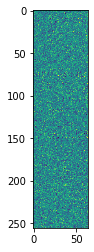

In [55]:
plt.imshow(
    reader.get_tensor('decoder_layer_1/multi_head_attention_4/query_kernel')[0],
    cmap='viridis',
    interpolation='nearest'
)

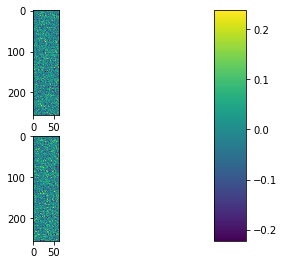

In [68]:
plt.subplot(211)
plt.imshow(
    reader.get_tensor('decoder_layer_1/multi_head_attention_4/query_kernel')[0],
    cmap='viridis'
)

plt.subplot(212)
plt.imshow(
    reader.get_tensor('decoder_layer_1/multi_head_attention_4/query_kernel')[1],
    cmap='viridis'
)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

plt.show()

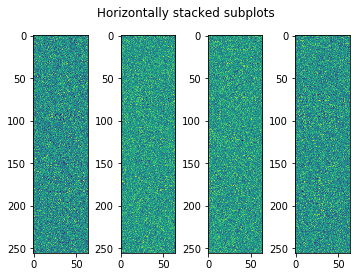

In [74]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.suptitle('Horizontally stacked subplots')
ax1.imshow(
    reader.get_tensor('decoder_layer_1/multi_head_attention_5/query_kernel')[0],
    cmap='viridis'
)
ax2.imshow(
    reader.get_tensor('decoder_layer_1/multi_head_attention_5/query_kernel')[1],
    cmap='viridis'
)
ax3.imshow(
    reader.get_tensor('decoder_layer_1/multi_head_attention_5/query_kernel')[2],
    cmap='viridis'
)
ax4.imshow(
    reader.get_tensor('decoder_layer_1/multi_head_attention_5/query_kernel')[3],
    cmap='viridis'
)